In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data/train.csv')
store_df = pd.read_csv('data/store.csv')
df_test = pd.read_csv('data/test.csv')
df_submit = pd.read_csv('data/sample_submission.csv')

C:\Users\kgavahi\AppData\Local\Temp\ipykernel_21732\4141378031.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/train.csv')


In [3]:
# Remove rows where 'open' column is zero
df = df.loc[df['Open'] != 0]

# Remove rows where 'Sales' column is zero
df = df.loc[df['Sales'] != 0]

In [4]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert the 'date' column to datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])  # Convert the 'date' column to datetime format

# Add a new column 'day_of_year' which represents the day of the year
df['DayOfYear'] = df['Date'].dt.dayofyear
df_test['DayOfYear'] = df_test['Date'].dt.dayofyear

# Extract month and season
df['Month'] = df['Date'].dt.month
df_test['Month'] = df_test['Date'].dt.month

(array([7.0000e+00, 1.3400e+02, 7.2300e+02, 2.0340e+03, 4.4830e+03,
        8.9070e+03, 1.4906e+04, 2.2511e+04, 3.2541e+04, 4.2084e+04,
        5.0082e+04, 5.5426e+04, 5.8603e+04, 5.9258e+04, 5.7526e+04,
        5.3574e+04, 4.8961e+04, 4.4591e+04, 4.0642e+04, 3.5245e+04,
        3.0488e+04, 2.6180e+04, 2.2823e+04, 1.9274e+04, 1.6759e+04,
        1.4188e+04, 1.2038e+04, 1.0058e+04, 8.4940e+03, 7.0150e+03,
        5.9830e+03, 5.0000e+03, 4.3130e+03, 3.6970e+03, 3.2260e+03,
        2.7500e+03, 2.3570e+03, 2.0170e+03, 1.8650e+03, 1.6310e+03,
        1.4620e+03, 1.1990e+03, 1.0920e+03, 1.0290e+03, 8.8900e+02,
        7.9300e+02, 7.3200e+02, 6.0300e+02, 5.5300e+02, 4.7600e+02,
        4.1300e+02, 3.4800e+02, 3.3600e+02, 2.5900e+02, 2.5000e+02,
        2.0400e+02, 1.8100e+02, 1.3700e+02, 1.0600e+02, 1.0900e+02,
        9.7000e+01, 6.4000e+01, 7.0000e+01, 6.4000e+01, 6.8000e+01,
        4.6000e+01, 3.9000e+01, 4.9000e+01, 3.6000e+01, 3.0000e+01,
        2.8000e+01, 2.4000e+01, 2.9000e+01, 1.80

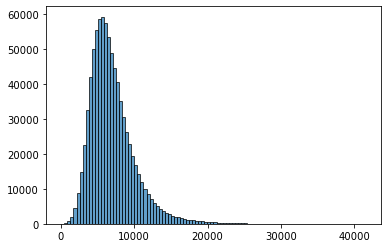

In [5]:
# Plot histogram
plt.hist(df['Sales'], bins=100, edgecolor='black', alpha=0.7)

In [7]:
target_store_number = 1

# Filtering the DataFrame by store
target_store_df = df.loc[df['Store'] == target_store_number]

(array([ 1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  2.,  5.,  3.,  5.,
        11.,  9.,  9., 20., 18., 21., 24., 19., 25., 23., 30., 20., 25.,
        17., 19., 20., 18., 19., 28., 24., 21., 15., 18., 26., 21.,  9.,
        20., 26., 16., 18., 18., 16., 15., 11.,  8., 13.,  8.,  5.,  6.,
         9.,  8.,  4.,  2.,  3.,  5.,  4.,  1.,  4.,  3.,  1.,  1.,  1.,
         3.,  1.,  3.,  2.,  1.,  1.,  0.,  2.,  0.,  1.,  2.,  1.,  1.,
         1.,  2.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([2362.  , 2433.66, 2505.32, 2576.98, 2648.64, 2720.3 , 2791.96,
        2863.62, 2935.28, 3006.94, 3078.6 , 3150.26, 3221.92, 3293.58,
        3365.24, 3436.9 , 3508.56, 3580.22, 3651.88, 3723.54, 3795.2 ,
        3866.86, 3938.52, 4010.18, 4081.84, 4153.5 , 4225.16, 4296.82,
        4368.48, 4440.14, 4511.8 , 4583.46, 4655.12, 4726.78, 4798.44,
        4870.1 , 4941.76, 5013.42, 5085.08, 5156.74, 5228.4 , 5300.06,
        

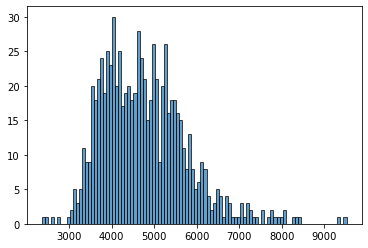

In [11]:
plt.hist(target_store_df['Sales'], bins=100, edgecolor='black', alpha=0.7)

In [8]:
# Calculate the mean of 'sales' for rows where 'promo' column is 1
mean_sales_with_promo = target_store_df.loc[target_store_df['Promo'] == 1, 'Sales'].mean()
print('target store with promo: ', mean_sales_with_promo)

mean_sales_without_promo = target_store_df.loc[target_store_df['Promo'] == 0, 'Sales'].mean()
print('target store without promo: ', mean_sales_without_promo)

target store with promo:  5300.111428571428
target store without promo:  4319.756380510441


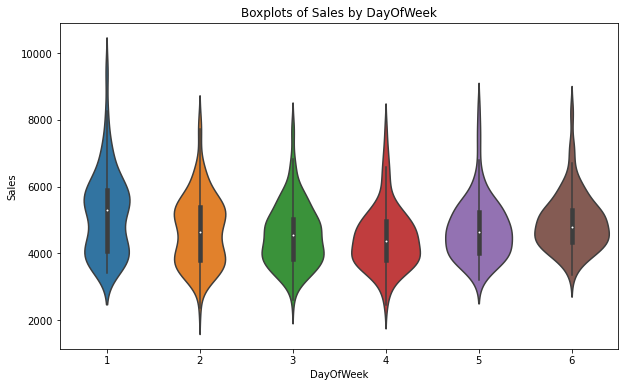

In [9]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Boxplots of Sales by DayOfWeek')
sns.violinplot(x='DayOfWeek', y='Sales', data=target_store_df)
plt.show()

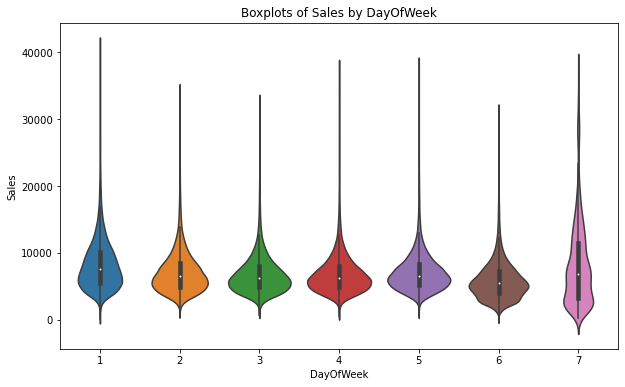

In [10]:
# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))
plt.title('Boxplots of Sales by DayOfWeek')
sns.violinplot(x='DayOfWeek', y='Sales', data=df)
plt.show()